Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Saved: synthetic_dataset/image_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Saved: synthetic_dataset/image_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Saved: synthetic_dataset/image_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Saved: synthetic_dataset/image_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Saved: synthetic_dataset/image_5.png


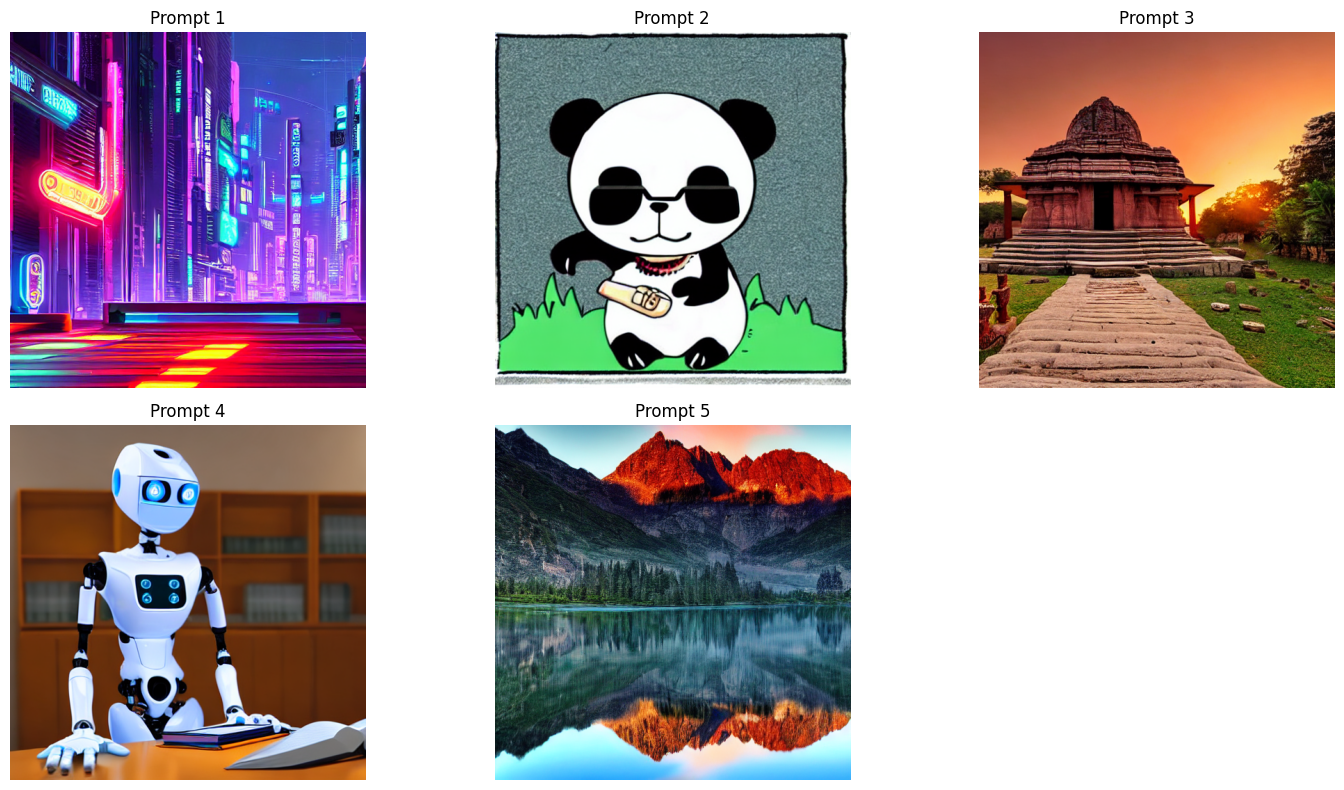

In [1]:

# Using Stable Diffusion (Diffusion Model)

import os
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

dataset_dir = "synthetic_dataset"
os.makedirs(dataset_dir, exist_ok=True)

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

# Use GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(device)

prompts = [
    "A futuristic cyberpunk street at night with neon lights, ultra realistic",
    "A cute baby panda wearing sunglasses, cartoon style",
    "Ancient Indian temple at sunrise, cinematic view",
    "A robot studying in a classroom, 3D render",
    "A peaceful mountain landscape with lake reflection, 8k wallpaper"
]


generated_images = []

for i, prompt in enumerate(prompts):
    image = pipe(prompt).images[0]

    file_path = os.path.join(dataset_dir, f"image_{i+1}.png")
    image.save(file_path)

    generated_images.append(image)
    print(f"✅ Saved: {file_path}")


# 5) Display Sample Outputs
plt.figure(figsize=(15, 8))

for i, img in enumerate(generated_images):
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prompt {i+1}")

plt.tight_layout()
plt.show()
